# 0. EDA

In [17]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [18]:
file_path = "./datasets/train.txt"
train = pd.read_csv(file_path, sep='\t', header=None, names=['LABEL', 'REVIEW'])
train

,LABEL,REVIEW
0,TRUTHFULPOSITIVE,The sheraton was a wonderful hotel! When me an...
1,TRUTHFULPOSITIVE,We stayed at the Omni between Christmas and Ne...
2,DECEPTIVENEGATIVE,I was REALLY looking forward to a nice relaxin...
3,TRUTHFULNEGATIVE,"First let me say, I try not to be too critical..."
4,DECEPTIVENEGATIVE,The Ambassador East Hotel is a terrible place ...
...,...,...
1395,TRUTHFULNEGATIVE,I stayed here for 5 nights last summer. I book...
1396,TRUTHFULPOSITIVE,Stayed here for 3 nights for a Bridgestone/Fir...
1397,TRUTHFULNEGATIVE,I am staying here now and actually am compelle...
1398,TRUTHFULNEGATIVE,We stayed at this hotel with our two teenage d...


In [19]:
# Check class distribution
entries_per_label = train['LABEL'].value_counts()
print(class_distribution)

DECEPTIVENEGATIVE    352
TRUTHFULNEGATIVE     352
TRUTHFULPOSITIVE     350
DECEPTIVEPOSITIVE    346
Name: LABEL, dtype: int64


In [20]:
# Calculate the length of each review and add it as a new column
train['REVIEW_LEN'] = train['REVIEW'].apply(len)

# Calculate mean, min, and max review length for each class
class_stats = train.groupby('LABEL')['REVIEW_LEN'].agg(['mean', 'min', 'max'])
print(class_stats)

                         mean  min   max
LABEL                                   
DECEPTIVENEGATIVE  934.715909  178  4074
DECEPTIVEPOSITIVE  635.104046  150  1877
TRUTHFULNEGATIVE   968.818182  215  3537
TRUTHFULPOSITIVE   674.271429  167  2446


In [25]:
# Calculate the length of each review and add it as a new column
train['REVIEW_WORD_COUNT'] = train['REVIEW'].apply(lambda x: len(x.split(" ")))

# Calculate mean, min, and max review length for each class
mean_words_per_label = train.groupby('LABEL')['REVIEW_WORD_COUNT'].mean()
print(class_stats)

                         mean  min   max
LABEL                                   
DECEPTIVENEGATIVE  934.715909  178  4074
DECEPTIVEPOSITIVE  635.104046  150  1877
TRUTHFULNEGATIVE   968.818182  215  3537
TRUTHFULPOSITIVE   674.271429  167  2446


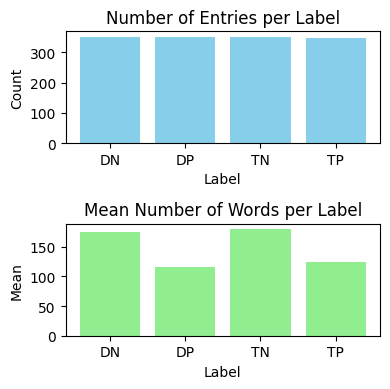

In [44]:
import matplotlib.pyplot as plt

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(4, 4))

# Plot number of entries per label
axes[0].bar(['DN', 'DP', 'TN', 'TP'], entries_per_label.values, color='skyblue')
axes[0].set_xlabel('Label')
axes[0].set_ylabel('Count')
axes[0].set_title('Number of Entries per Label')

# # Plot mean number of words per label
axes[1].bar(['DN', 'DP', 'TN', 'TP'], mean_words_per_label.values, color='lightgreen')
axes[1].set_xlabel('Label')
axes[1].set_ylabel('Mean')
axes[1].set_title('Mean Number of Words per Label')
# axes[1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels by 45 degrees

# Automatically adjust subplot params for better layout
plt.tight_layout()

# Save the plots
plt.savefig('eda.png')